In [1]:
import pandas as pd
import numpy as np
import re
import random

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_location = 'https://github.com/DHDSDesafios/DH_DS_desafio_2_properati/raw/master/data/properatid2caba.zip'
data = pd.read_csv(data_location, compression='zip', encoding="utf-8")

In [4]:
pd.set_option('display.max_colwidth', 1500)
pd.set_option('display.max_rows', 400)

<a id="section_og"></a> 
### Observaciones Generales

[volver a TOC](#section_toc)

In [5]:
data.sample(10)

,Id_caso,property_type,place_with_parent_names,country_name,state_name,lat-lon,lat,lon,price,currency,...,surface_total_in_m2,surface_covered_in_m2,cochera,piscina,parrilla,baulera,balcon,terraza,jardin,lavadero
5220,24674,PH,|Argentina|Capital Federal|Flores|,Argentina,Capital Federal,"-34.6314909,-58.463062",-34.631491,-58.463062,215000.0,USD,...,173.0,159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4840,22813,apartment,|Argentina|Capital Federal|Recoleta|,Argentina,Capital Federal,"-34.5962704,-58.3999931",-34.596270,-58.399993,152000.0,USD,...,40.0,40.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
8428,35462,apartment,|Argentina|Capital Federal|Recoleta|,Argentina,Capital Federal,"-34.59524,-58.393127",-34.595240,-58.393127,485000.0,USD,...,NaN,167.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
22302,88552,apartment,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,NaN,NaN,NaN,NaN,NaN,...,60.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17614,72858,apartment,|Argentina|Capital Federal|Almagro|,Argentina,Capital Federal,"-34.6026608626,-58.4269730253",-34.602661,-58.426973,245000.0,USD,...,120.0,110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
26111,109867,apartment,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,"-34.5653889503,-58.4716127614",-34.565389,-58.471613,99000.0,USD,...,40.0,35.0,1.0,1.0,1.0,1.0,1,1.0,NaN,NaN
20798,83514,apartment,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,NaN,NaN,NaN,150000.0,USD,...,72.0,64.0,1.0,NaN,1.0,NaN,balcon,1.0,NaN,NaN
2486,12353,apartment,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,Argentina,Capital Federal,"-34.5794759,-58.4387444",-34.579476,-58.438744,750000.0,USD,...,243.0,143.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN
8374,35159,apartment,|Argentina|Capital Federal|Floresta|,Argentina,Capital Federal,"-34.62384,-58.4885007",-34.623840,-58.488501,179000.0,USD,...,79.0,73.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
18207,74399,apartment,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,"-34.5607194235,-58.4591651663",-34.560719,-58.459165,92000.0,USD,...,38.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.columns

Index(['Id_caso', 'property_type', 'place_with_parent_names', 'country_name',
       'state_name', 'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'floor', 'rooms',
       'expenses', 'description', 'title', 'Pais', 'Zona', 'Partido_barrio',
       'Localidad', 'Obs_localidad', 'place_name', 'geonames_id',
       'price_usd_per_m2', 'price_per_m2', 'surface_total_in_m2',
       'surface_covered_in_m2', 'cochera', 'piscina', 'parrilla', 'baulera',
       'balcon', 'terraza', 'jardin', 'lavadero'],
      dtype='object')

In [7]:
data.shape

(29380, 36)

In [8]:
caba_place_name_mask = data.place_name != 'Capital Federal'
surface_covered_mask_notnull = data.surface_total_in_m2.notnull()  #cambio las variables
price_per_m2_mask_notnull = data.price_usd_per_m2.notnull()  # cambio las variables

In [9]:
data = data.loc[caba_place_name_mask & surface_covered_mask_notnull & price_per_m2_mask_notnull]

In [10]:
data.shape

(21895, 36)

# ANALISIS DE OUTLIERS SOBRE PRECIO POR M2

In [11]:
col = ['Id_caso', 'property_type', 'place_name', 'price_aprox_usd','surface_total_in_m2','price_usd_per_m2']
data_ver = data.loc[:,col]

In [12]:
data_ver

,Id_caso,property_type,place_name,price_aprox_usd,surface_total_in_m2,price_usd_per_m2
0,0,PH,Mataderos,62000.0,55.0,1127.27
1,2,apartment,Mataderos,72000.0,55.0,1309.09
3,7,apartment,Belgrano,138000.0,45.0,3066.67
4,8,apartment,Belgrano,195000.0,65.0,3000.00
5,13,apartment,Palermo Soho,111700.0,50.0,2234.00
...,...,...,...,...,...,...
29375,121157,apartment,Belgrano,128000.0,38.0,3368.42
29376,121158,apartment,Recoleta,165000.0,44.0,3750.00
29377,121209,apartment,Belgrano,410000.0,157.0,2611.46
29378,121215,apartment,Belgrano,870000.0,113.0,7699.12


## EJEMPLO SOBRE PLACE_NAME = BELGRANO

Q Belgrano    2082
Name: place_name, dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

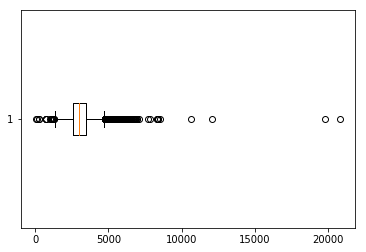

In [13]:
place_name_mask = data_ver.place_name == 'Belgrano'
data_Belgrano = data_ver.loc[place_name_mask]
print ("Q",data_Belgrano.place_name.value_counts() )
plt.boxplot(data_Belgrano["price_usd_per_m2"], vert = False)
plt.show

In [14]:
Q1_Belgrano = data_Belgrano["price_usd_per_m2"].quantile(0.25)
print ("Primer Cuartil", Q1_Belgrano)

Q3_Belgrano = data_Belgrano["price_usd_per_m2"].quantile(0.75)
print ("Tercer Cuartil", Q3_Belgrano)

IQR_Belgrano = Q3_Belgrano - Q1_Belgrano
print ("Rango Intercuartil", IQR_Belgrano)

Bi_Belgrano = (Q1_Belgrano - 1.5 * IQR_Belgrano)
print ("Bi", Bi_Belgrano)

Bs_Belgrano = (Q3_Belgrano + 1.5 * IQR_Belgrano)
print ("Bs", Bs_Belgrano)



Primer Cuartil 2594.59
Tercer Cuartil 3448.87
Rango Intercuartil 854.2799999999997
Bi 1313.1700000000005
Bs 4730.289999999999


In [15]:
sin_outliers_Belgrano = (data_Belgrano["price_usd_per_m2"] >= Bi_Belgrano) & (data_Belgrano["price_usd_per_m2"] <= Bs_Belgrano)
data_Belgrano_sin_outliers = data_Belgrano.loc[sin_outliers_Belgrano]

In [16]:
data_Belgrano_sin_outliers.shape

(1935, 6)

## MISMO EJEMPLO PERO USANDO UNA FUNCION QUE RECORRE CADA PLACE_NAME

In [17]:
def remove_outlier(df_in, mask, col_name):
    place_name_mask = df_in.place_name == mask
    q1 = df_in.loc[place_name_mask, col_name].quantile(0.25)
    q3 = df_in.loc[place_name_mask, col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high) & place_name_mask]
    return df_out

In [18]:
df_final = data_ver.iloc[0:0]
place_name_list = data_ver.place_name.unique()
for place_name_n in place_name_list:
    df_final1 = remove_outlier(data_ver, place_name_n,  "price_usd_per_m2")
    df_final = df_final.append(df_final1)

In [19]:
df_final

,Id_caso,property_type,place_name,price_aprox_usd,surface_total_in_m2,price_usd_per_m2
0,0,PH,Mataderos,62000.0,55.0,1127.27
1,2,apartment,Mataderos,72000.0,55.0,1309.09
7,16,PH,Mataderos,239000.0,140.0,1707.14
61,254,PH,Mataderos,53000.0,28.0,1892.86
126,557,PH,Mataderos,245000.0,326.0,751.53
...,...,...,...,...,...,...
26134,109935,PH,Villa Real,159000.0,125.0,1272.00
26481,110797,PH,Villa Real,156000.0,75.0,2080.00
4887,22956,PH,Villa Riachuelo,150000.0,122.0,1229.51
8083,33674,house,Villa Riachuelo,200000.0,260.0,769.23


## VALIDAMOS EL RESULTADO SOBRE BELGRANO

In [20]:
place_name_mask_ver = df_final.place_name == 'Belgrano'
data_Belgrano_borrar = df_final.loc[place_name_mask_ver]

In [21]:
data_Belgrano_borrar.shape

(1935, 6)